# The problem
Predicting the value of a house from set of parameters - univariate multiple regression problem. 

# Performance measure
RMSE (l_2), it could also be Mean Absolute Error (l_1)



The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

# Assumptions

The predicted prices will be used as numerical values after delivering them downstream


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

# Load data

In [16]:
data_file = 'data/house.csv'
housing = pd.read_csv(data_file)

According to the task, only some columns of the dataset are to be used

In [17]:
features = ['id', 'date', 'price', 'price_bin',
                 'bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'floors', 'waterfront',
                'view', 'condition', 'grade', 
                'sqft_above', 'sqft_basement', 'yr_built']

housing = housing[features]

# First look at the data

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
price_bin        21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


No columns contain null values - perfect, additionally, all of the attributes are numerical

In [19]:
housing.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000


In [20]:
housing.head()

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,20141013T000000,221900.0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,5631500400,20150225T000000,180000.0,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,2487200875,20141209T000000,604000.0,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,1954400510,20150218T000000,510000.0,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


To clarify - what does 0.75 bathroom look like? Why are the floors not an integer?

In [21]:
housing[housing['bathrooms'] % 1 != 0]

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
5,7237550310,20140512T000000,1230000.0,1,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001
6,1321400060,20140627T000000,257500.0,0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995
7,2008000270,20150115T000000,291850.0,0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963
9,3793500160,20150312T000000,323000.0,0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009
21609,6600060120,20150223T000000,400000.0,0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014
21610,1523300141,20140623T000000,402101.0,0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009
21611,291310100,20150116T000000,400000.0,0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004


In [22]:
housing[housing['floors'] % 1 != 0]

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
12,114101516,20140528T000000,310000.0,0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927
14,1175000570,20150312T000000,530000.0,0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900
17,6865200140,20140529T000000,485000.0,0,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916
25,1202000200,20141103T000000,233000.0,0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941
27,3303700376,20141201T000000,667000.0,0,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21345,3630200480,20140612T000000,680000.0,0,3,2.50,2570,3600,2.5,0,0,3,9,2570,0,2007
21386,774101755,20150417T000000,320000.0,0,3,1.75,1790,66250,1.5,0,0,3,7,1790,0,2003
21457,3629700120,20141014T000000,669950.0,0,3,3.00,2330,1944,2.5,0,0,3,8,1950,380,2014
21502,2770601782,20140801T000000,453000.0,0,3,2.50,1510,1618,2.5,0,0,3,8,1330,180,2011


There are multiple records with values that are not whole numbers, so this does not seem like a mistake. "For now, we can assume that the 0.75 bathroom is a bathroom without a shower/bathtub, and that the 'uneven' floors are non-standard, e.g. the attic. 

In a real project, this would be a great moment to ask about this kind of issues.

In [23]:
housing['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

The waterfront feature is pretty self-explainatory

In [25]:
housing['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Additional information on the 'view' property would be nice. Is the view getting better with the grades? Or is it lack of view (0) and different, but not necesarrily better views (1-4). If the latter is true, one hot encoding might be needed. For now, I'll assume that the view is getting better with the value of this property.

# Preliminary cleaning

Since the 'id' column does not provide us with any additional information, we will also get rid of it

In [26]:
# TODO: move this to a pipeline
# housing.drop(['id'], axis=1, inplace=True)

The 'date' column could be much nicer, lets go ahead and do that:

In [27]:
# housing['date'] = pd.to_datetime(housing['date'])

In [28]:
housing.head()

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,20141013T000000,221900.0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,5631500400,20150225T000000,180000.0,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,2487200875,20141209T000000,604000.0,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,1954400510,20150218T000000,510000.0,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


# Train-test split

Lets split the data to not leak any information from the set we will be testing on.

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [30]:
housing_full = housing.copy()
housing = train_set.copy()

# Data exploration

Lets now take a look at the distributions. This is not a very big data and we do not have too many features. Thus, we have chance to plot most of them and reach some useful analytical results. 

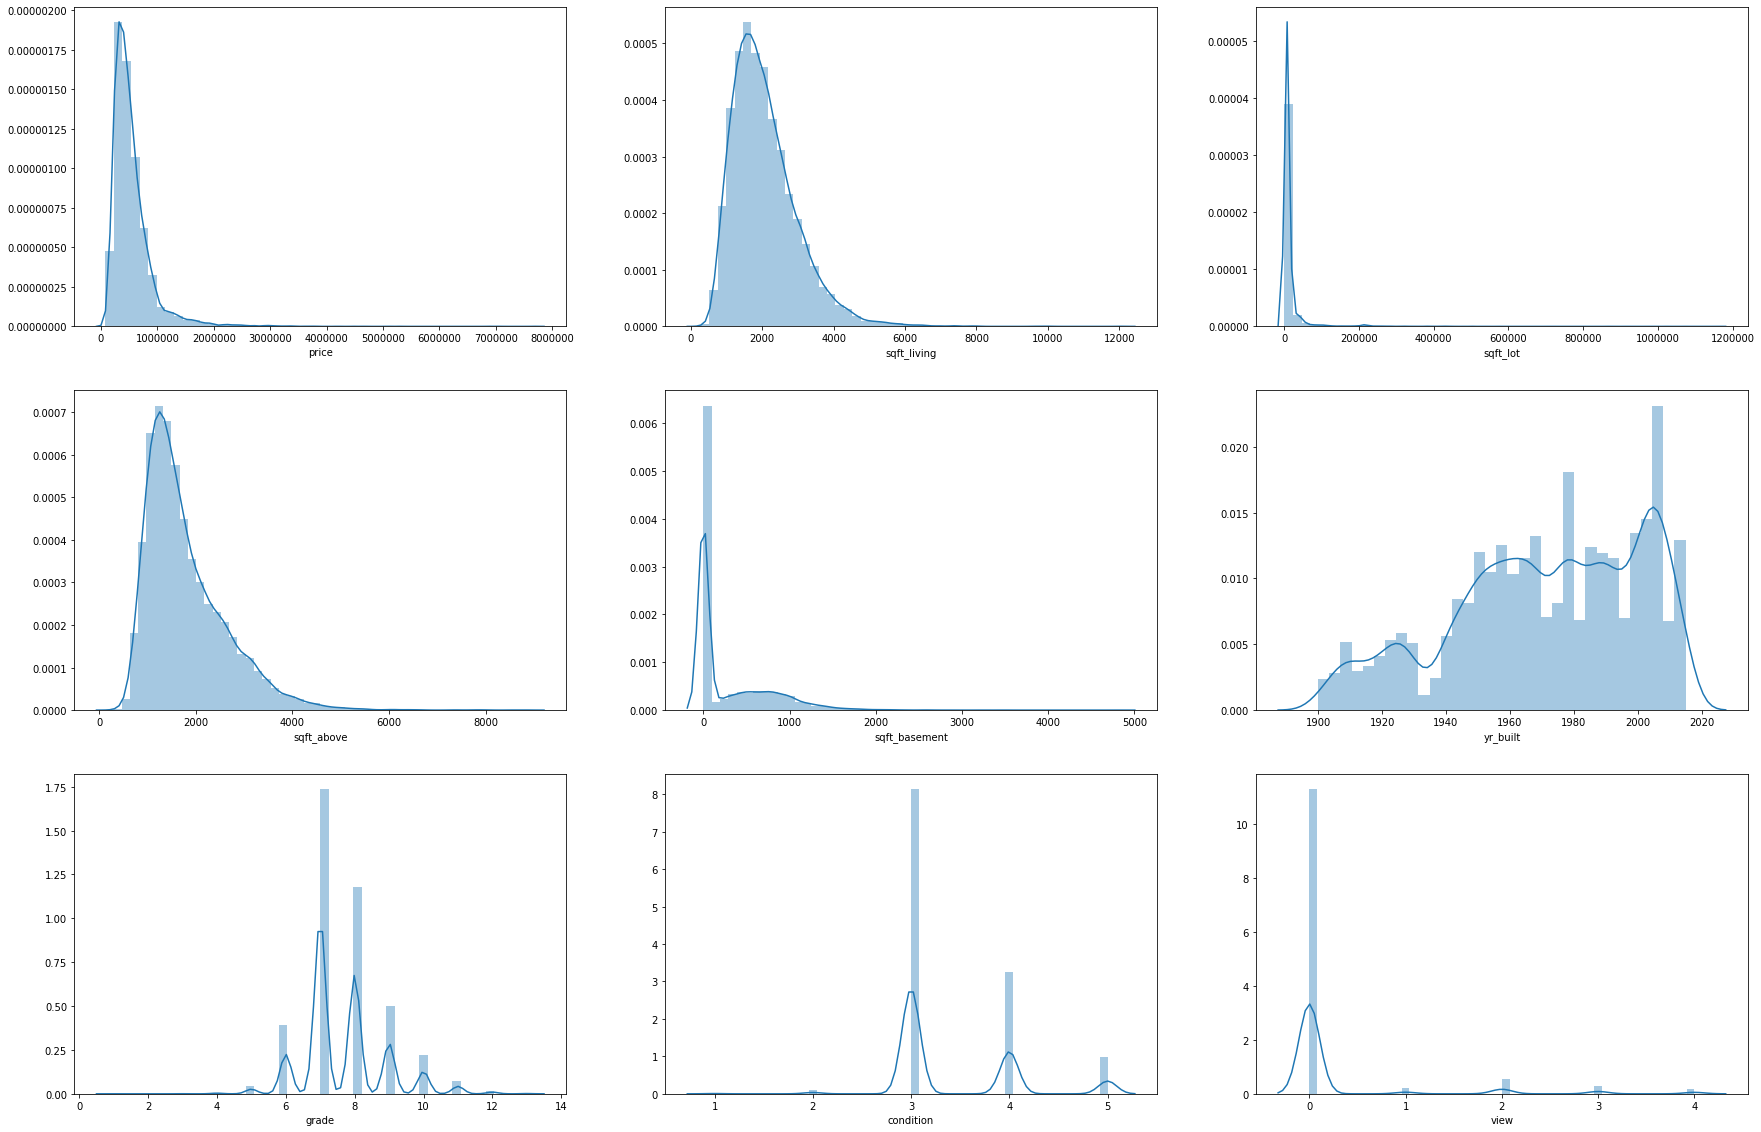

In [73]:
columns_to_plot = ['price', 'sqft_living', 'sqft_lot',
                   'sqft_above', 'sqft_basement', 'yr_built',
                   'grade', 'condition', 'view']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (30, 20))

for i, column in enumerate(columns_to_plot):
    sns.distplot(housing[column], ax=axes[i//nrow, i%ncol],
                )

We can already see some possible problems with this dataset:

The properties have different ranges, from [0-1] range ('waterfront'), to [0-10000] range ('sqft_living'). This might cause problems for some algorithms and make the gradient descent slower. We will test what effect will features scaling have. 

Additionally, 'bedrooms' and 'sqft_lot' which have a very long-tailed distribution. This might indicate the presence of errors in the dataset, which might be pesky to deal with later, so we will examine and try to clean up before creating a model.

Let's examine the bedrooms first:

In [17]:
counts = housing['bedrooms'].value_counts(ascending=True)
print(counts)

33       1
10       2
9        5
0        8
8        9
7       29
1      153
6      212
5     1292
2     2237
4     5477
3     7865
Name: bedrooms, dtype: int64


As suspected, we have the most data in the 1-6 bedroom range, with several outliers - one of the houses has 33 bedrooms, and some of them have none (!). Let's examine them and see if we can find a pattern

In [149]:
housing.loc[(housing['bedrooms'] == 33)]

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
15870,2402100895,20140625T000000,640000.0,0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947


33 bedrooms in 1620sqft seems very suspicious. Lets compare this with similar apartments:

In [19]:
housing.loc[housing['sqft_living'] == 1620].describe()

,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,83.000000,83.0,83.000000,83.000000,83.0,83.000000,83.000000,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,443350.578313,0.0,3.469880,1.870482,1620.0,10357.048193,1.530120,0.0,0.216867,3.506024,7.265060,1440.000000,180.000000,1965.409639
std,145783.360677,0.0,3.328873,0.511099,0.0,25407.536708,0.631246,0.0,0.827105,0.722014,0.564916,243.570994,243.570994,31.152667
min,218000.000000,0.0,2.000000,1.000000,1620.0,997.000000,1.000000,0.0,0.000000,3.000000,6.000000,830.000000,0.000000,1900.000000
25%,333975.000000,0.0,3.000000,1.500000,1620.0,3777.500000,1.000000,0.0,0.000000,3.000000,7.000000,1220.000000,0.000000,1947.000000
50%,430000.000000,0.0,3.000000,1.750000,1620.0,6000.000000,1.500000,0.0,0.000000,3.000000,7.000000,1620.000000,0.000000,1966.000000
75%,525000.000000,0.0,3.000000,2.250000,1620.0,8128.500000,2.000000,0.0,0.000000,4.000000,8.000000,1620.000000,400.000000,1989.000000
max,842000.000000,0.0,33.000000,2.750000,1620.0,219542.000000,3.000000,0.0,4.000000,5.000000,9.000000,1620.000000,790.000000,2014.000000


As expected, the actual number of bedrooms in similar apartments is much lower, around 3.5. We can assume for now that this value has been entered incorrectly, and change it to the mean (4), as most of the other fields for this record seem to be in the correct range.

In [ ]:
housing.loc[15870, 'bedrooms'] = 4

Now, let's check the apartments with no bedrooms or bathrooms.

In [21]:
rooms_outlier = housing.loc[(housing['bedrooms'] == 0) | (housing['bathrooms'] == 0)]
rooms_outlier.head()

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
3119,2015-02-05,380000.0,0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006
3467,2014-08-05,288000.0,0,0,1.5,1430,1650,3.0,0,0,3,7,1430,0,1999
1149,2015-02-17,75000.0,0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966
6994,2014-06-24,1300000.0,1,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990
19452,2014-09-26,142000.0,0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963


In [151]:
rooms_outlier.describe()

,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.0,11.000000,11.000000,11.00000,11.000000,11.0,11.000000
mean,3.524500e+05,0.090909,0.272727,0.681818,1317.636364,15053.00000,1.636364,0.0,0.181818,2.818182,6.00000,1317.636364,0.0,1971.818182
std,3.348026e+05,0.301511,0.467099,1.031327,1263.875569,13745.03052,0.809040,0.0,0.603023,0.873863,3.03315,1263.875569,0.0,29.862412
min,7.500000e+04,0.000000,0.000000,0.000000,290.000000,979.00000,1.000000,0.0,0.000000,1.000000,1.00000,290.000000,0.0,1913.000000
25%,1.850000e+05,0.000000,0.000000,0.000000,635.000000,4969.00000,1.000000,0.0,0.000000,2.500000,3.50000,635.000000,0.0,1951.500000
50%,2.800000e+05,0.000000,0.000000,0.000000,844.000000,7111.00000,1.000000,0.0,0.000000,3.000000,7.00000,844.000000,0.0,1966.000000
75%,3.500000e+05,0.000000,0.500000,1.250000,1480.000000,23872.50000,2.000000,0.0,0.000000,3.000000,7.00000,1480.000000,0.0,1999.000000
max,1.300000e+06,1.000000,1.000000,2.500000,4810.000000,43377.00000,3.000000,0.0,2.000000,4.000000,12.00000,4810.000000,0.0,2006.000000


We have 11 records, that have either 0 bedrooms, or 0 bathrooms. Once again, we would want clarify whether it is an error or is this one of the use cases for our final model (e.g. predicting prices of garages). For now, we will just get rid of those records.  

In [22]:
housing.drop(rooms_outlier.index, inplace=True)

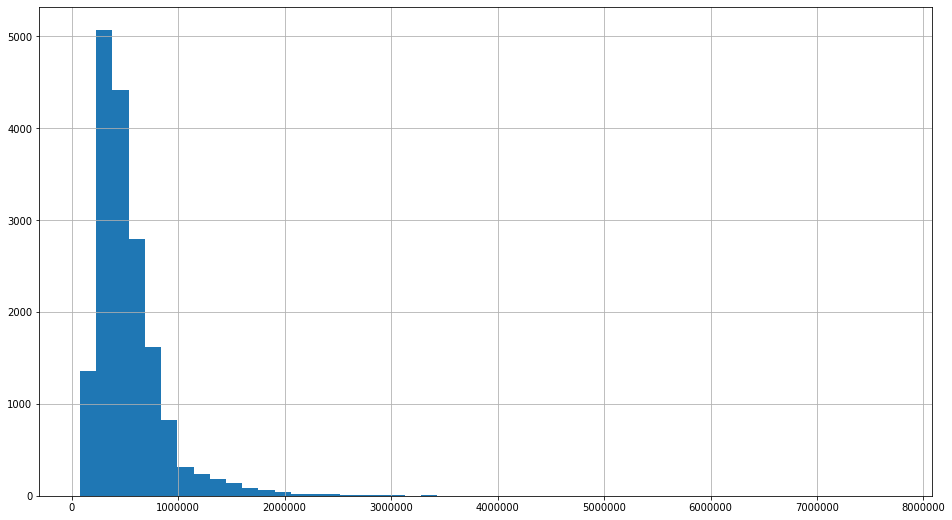

In [23]:
housing['price'].hist(bins=50, figsize=(16, 9))

Let's now check the record with the highest price

In [24]:
housing.sort_values(by=['price'], ascending=False).head(10)

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
7252,2014-10-13,7700000.0,1,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910
3914,2014-06-11,7060000.0,1,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940
9254,2014-09-19,6890000.0,1,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001
1315,2015-04-13,5300000.0,1,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991
1164,2014-10-20,5110000.0,1,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999
8092,2014-06-17,4670000.0,1,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983
8638,2014-06-18,4490000.0,1,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001
12370,2015-05-06,4210000.0,1,5,6.00,7440,21540,2.0,0,0,3,12,5550,1890,2003
7035,2014-07-01,3800000.0,1,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978
19017,2014-09-11,3800000.0,1,3,4.25,5510,35000,2.0,0,4,3,13,4910,600,1997


This looks possible, as all of these properties have a very high grade, huge living area and are in decent condition.

In [25]:
correlation_matrix = housing.corr()
correlations = correlation_matrix['price'].sort_values(ascending=False)
print(correlations)

price            1.000000
price_bin        0.730568
sqft_living      0.701540
grade            0.665530
sqft_above       0.602998
bathrooms        0.527166
view             0.392343
sqft_basement    0.321335
bedrooms         0.317394
floors           0.253531
waterfront       0.252993
sqft_lot         0.091032
yr_built         0.048958
condition        0.035978
Name: price, dtype: float64


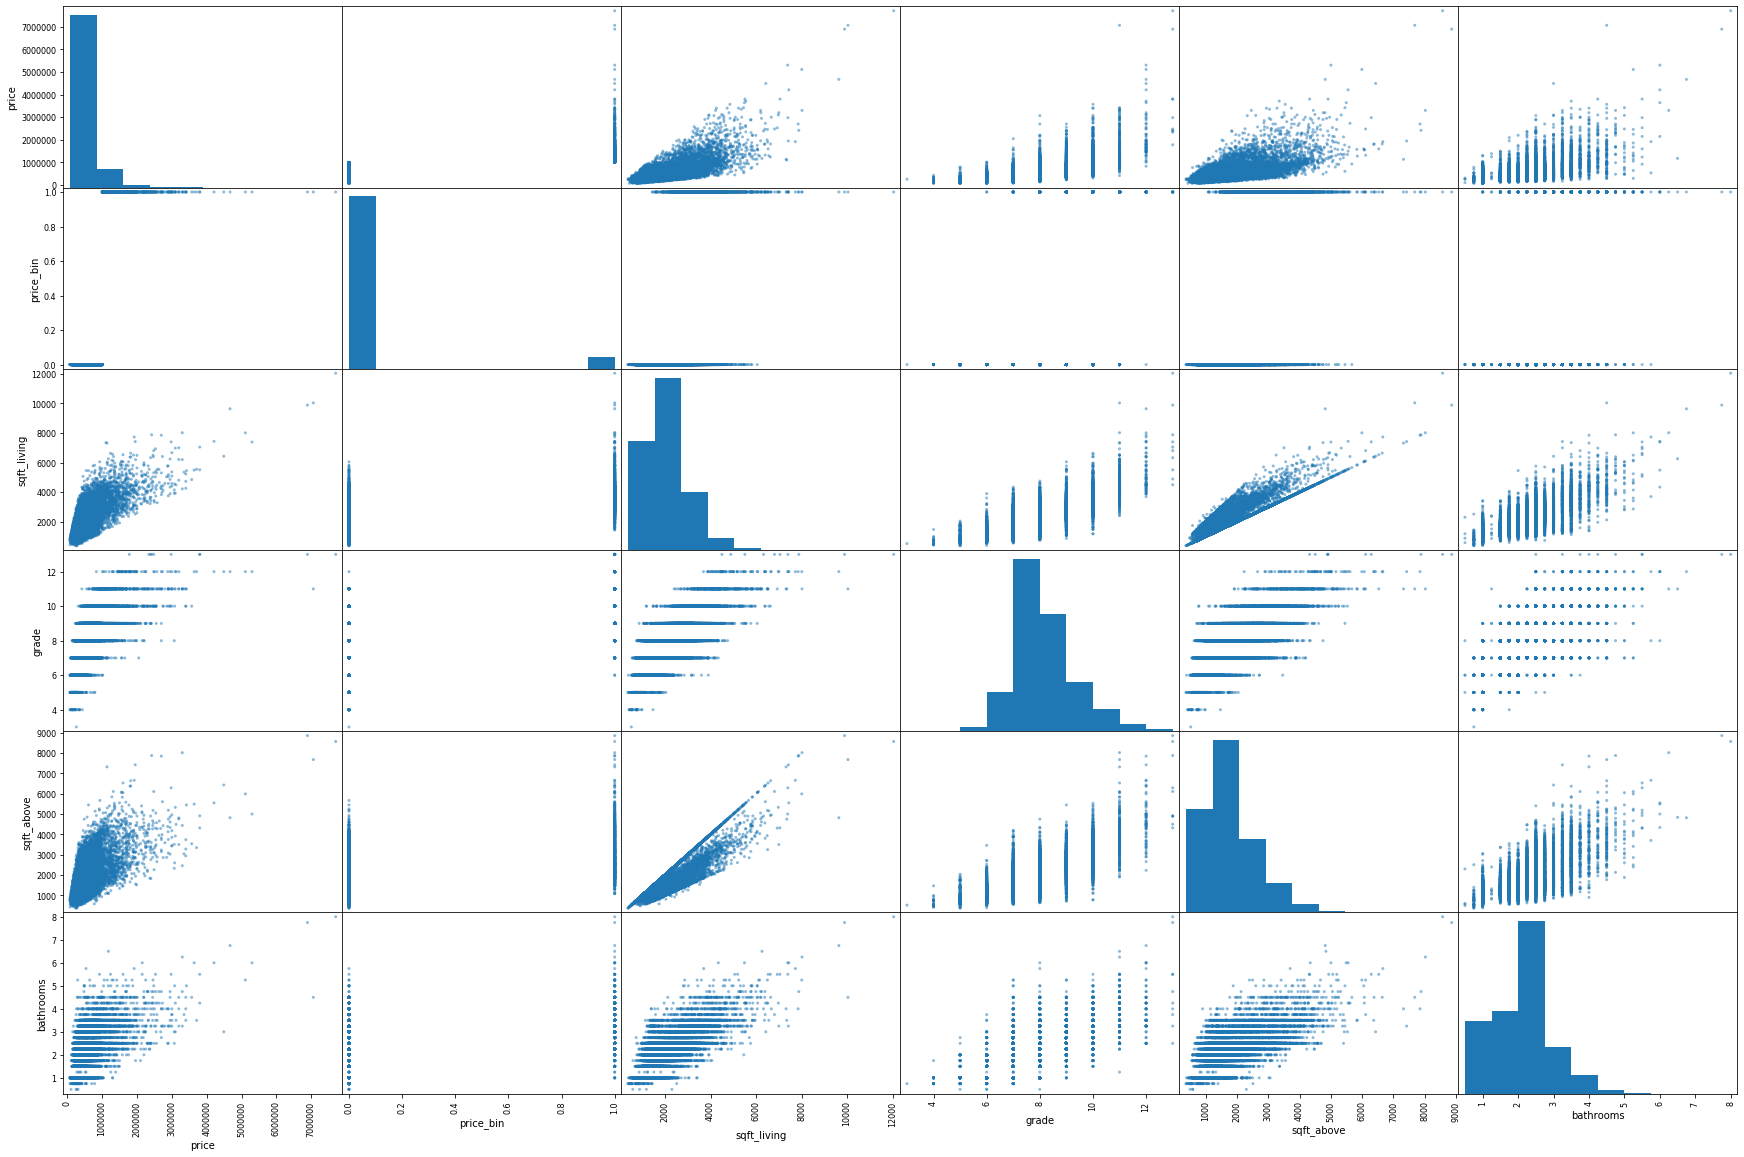

In [26]:
attributes = correlations.index[:6]
ax = pd.plotting.scatter_matrix(housing[attributes], figsize=(30, 20))

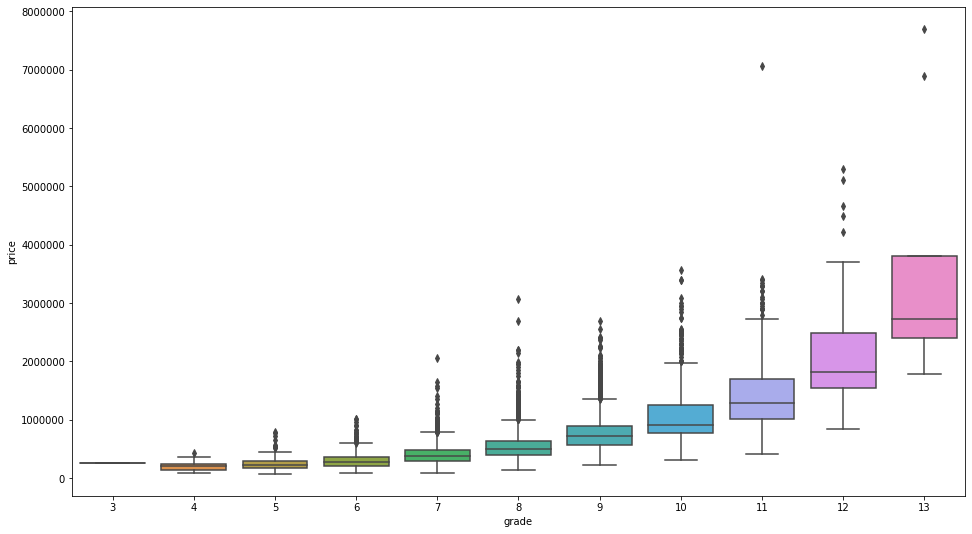

In [137]:
f, axe = plt.subplots(1, 1, figsize=(16,9))
sns.boxplot(x=housing['grade'], y=housing['price'],ax = axe)

At this stage, we can start questioning if the 'grade' column is really the slope of the lot. It has a very high correlation with price, and at the same time, there seems to be no flat lots, with the majority of them having 7-8° (see below), which seems suspicious.

Since the data is for King County, WA, this seems to be a better, and more fitting description of grade:
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

SOURCE: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

This would explain a very high correlation with price much bettar than the lot slope.

In [28]:
housing['rooms'] = housing['bedrooms'] + housing['bathrooms']
housing['room_ratio'] = housing['bedrooms'] / housing['bathrooms']

In [29]:
correlation_matrix = housing.corr()
correlations = correlation_matrix['price'].sort_values(ascending=False)
print(correlations)

price            1.000000
price_bin        0.730568
sqft_living      0.701540
grade            0.665530
sqft_above       0.602998
bathrooms        0.527166
rooms            0.472490
view             0.392343
sqft_basement    0.321335
bedrooms         0.317394
floors           0.253531
waterfront       0.252993
sqft_lot         0.091032
yr_built         0.048958
condition        0.035978
room_ratio      -0.256174
Name: price, dtype: float64


# Correlation Matrix

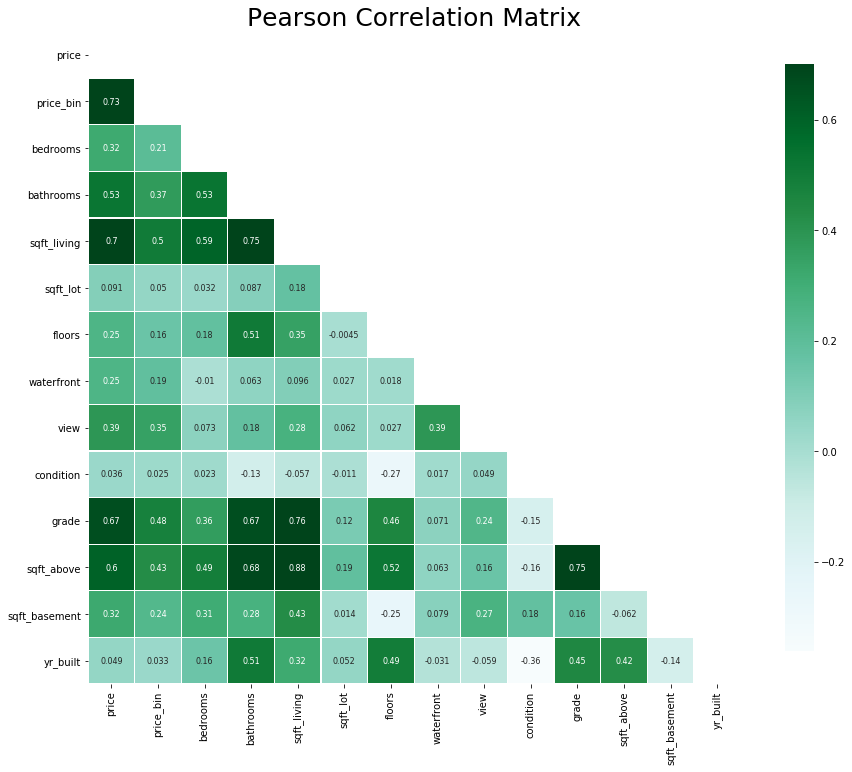

In [30]:
features = ['date', 'price', 'price_bin',
             'bedrooms', 'bathrooms', 'sqft_living',
             'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built']
mask = np.zeros_like(housing[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(housing[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Creating simple model

In [111]:
X_train = housing.drop(['price','price_bin', 'date'], axis=1)
y_train = housing['price']

In [112]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,rooms,room_ratio
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,4.75,1.714286
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,3.00,2.000000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,4.00,3.000000
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,5.25,1.333333
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,4.50,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,4.50,2.000000
21575,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,5.50,1.200000
5390,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,5.50,1.200000
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,1.75,1.333333


In [114]:
X_train[X_train['sqft_basement'] > 0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,rooms,room_ratio
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,3.00,2.000000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,4.00,3.000000
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,5.25,1.333333
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,4.50,0.800000
8993,3,1.75,2340,51836,1.5,0,0,3,8,1510,830,1978,4.75,1.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,3,1.50,1260,3135,1.0,0,0,4,7,780,480,1944,4.50,2.000000
769,3,2.50,3170,12750,2.0,0,0,3,10,2360,810,1995,5.50,1.200000
1685,4,3.50,3530,14406,2.0,0,1,3,10,2570,960,1987,7.50,1.142857
4426,3,2.75,2730,38869,1.5,1,4,3,9,1940,790,1963,5.75,1.090909


In [32]:
def display_scores(scores):
    print("Scores:", ', '.join('{:.2f}'.format(x) for x in scores))
    print("Mean: {:.2f}".format(scores.mean()))
    print("Standard deviation: {:.2f}".format(scores.std()))

In [96]:
X_train_prepared = housing_prepared.drop(['price'], axis=1)
y_train_prepared = housing_prepared['price']

KeyError: "['price'] not found in axis"

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: 203784.75, 189636.90, 174090.44, 168416.40, 162777.64
Mean: 179741.22
Standard deviation: 14993.08


In [133]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_prepared, y_train)
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: 231738.34, 215389.90, 208723.38, 200654.97, 198934.31
Mean: 211088.18
Standard deviation: 11891.97


In [102]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

predictions=tree_reg.predict(X_train)
tree_rmse = mean_squared_error(predictions, y_train, squared=False)
tree_rmse

tree_scores = cross_val_score(tree_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: 232104.61, 227153.99, 220362.09, 215459.15, 216555.31
Mean: 222327.03
Standard deviation: 6375.61


In [98]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
forest_reg.fit(X_train, y_train)

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: 0.80, 0.79, 0.80, 0.81, 0.79
Mean: 0.80
Standard deviation: 0.01


Let's also try XGBoost and see if we can get better predictions on non-normalized data

In [106]:
tree_reg.score(X_train, y_train)

0.9992247258058234

In [107]:
forest_reg.score(X_train, y_train)

0.9701118726117616

In [108]:
lin_reg.score(X_train, y_train)

0.7532633581643077

In [115]:
for i in [lin_reg, tree_reg, forest_reg]:
    print("{:.2f}".format(i.score(X_train, y_train)))

0.75
1.00
0.97


Looks like the Random Forest Regressor performs the best out of the reviewed models

Lets try more data preprocessing now:

In [124]:
from xgboost import XGBRegressor, DMatrix
from xgboost import cv as xgb_cv
xgb = XGBRegressor(objective ='reg:squarederror')
xgb.fit(X_train_prepared, y_train)

/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [125]:
xgb_scores = cross_val_score(xgb, X_train_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Scores: 195553.95, 187215.88, 189029.70, 180706.12, 182169.19
Mean: 186934.97
Standard deviation: 5296.50


In [131]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror')
xgb.fit(X_train_prepared, y_train)

/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [132]:
xgb_scores = cross_val_score(xgb, X_train_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Scores: 195520.95, 187215.88, 189029.70, 180706.12, 182169.19
Mean: 186928.37
Standard deviation: 5285.77


In [106]:
# TODO: gather results

In [89]:
housing.skew()

price             4.031646
price_bin         3.489561
bedrooms          0.514843
bathrooms         0.471780
sqft_living       1.372261
sqft_lot         11.586573
floors            0.614472
waterfront       11.678085
view              3.402474
condition         1.032733
grade             0.777986
sqft_above        1.427802
sqft_basement     1.569777
yr_built         -0.471828
rooms             0.385642
room_ratio        1.492383
dtype: float64

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer


X_train_prepared = X_train.copy()
housing_pipeline = Pipeline([
    ('std_scaler', RobustScaler())
])

full_pipeline = ColumnTransformer(housing_pipeline)

train_columns = X_train.columns
scaler = RobustScaler(quantile_range = (10, 90))
columns_to_standarize = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

columns_to_normalize = [x for x in train_columns if x not in columns_to_standarize]

X_train_prepared[columns_to_standarize] = scaler.fit_transform(X_train[columns_to_standarize]) 


# df[df.columns] = scaler.fit_transform(df[df.columns])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f7c21e130>,
      dtype=object)

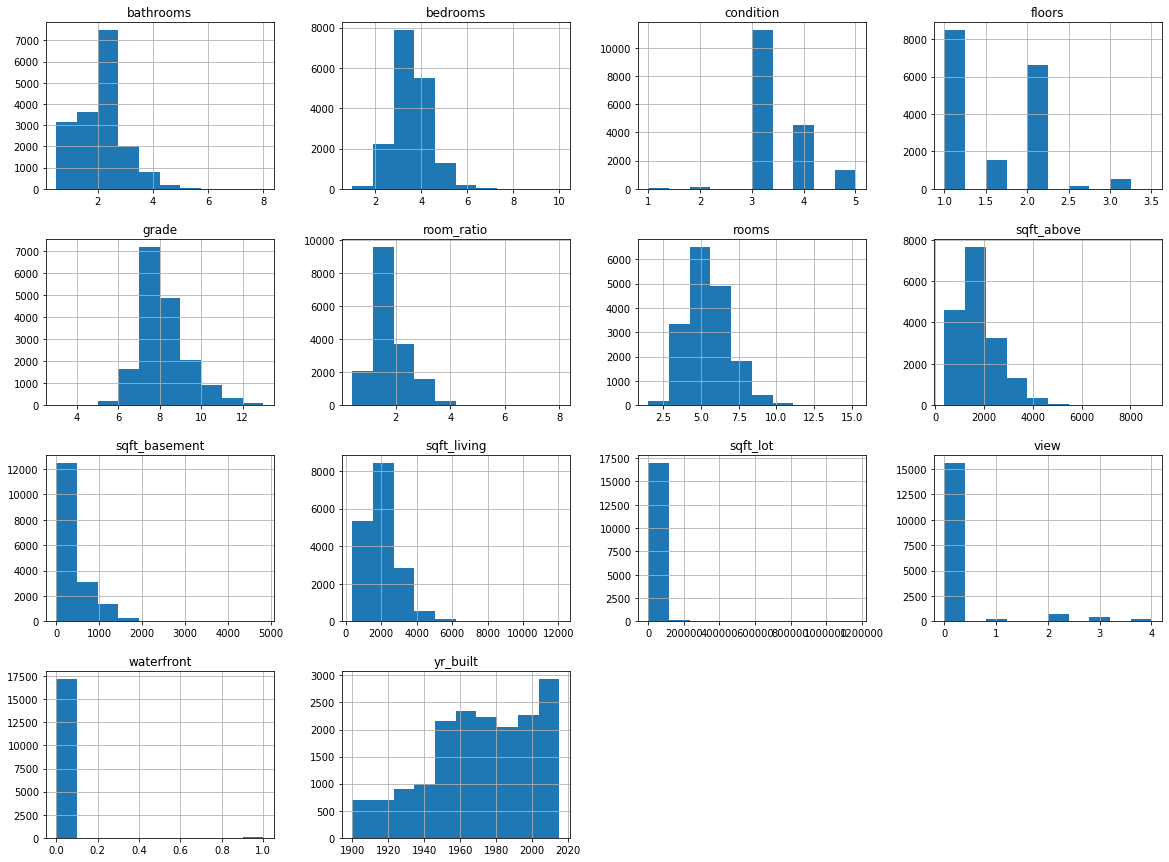

In [130]:
X_train_prepared.hist(figsize=(20, 15))

In [54]:
xgb.predict(X_train.head())

array([513273.56, 365918.5 , 252862.86, 398369.06, 479351.25],
      dtype=float32)

In [50]:
params = {'eta': 0.02, 'max_depth': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'binary:logistic', 'seed': 99, 'silent': 1, 'eval_metric':'auc', 'nthread':4}
xgb_train = DMatrix(X_train, label=y_train)
cv = xgb_cv(params, xgb_train, 5000, nfold=5, early_stopping_rounds=10, verbose_eval=1)

XGBoostError: [10:54:55] /workspace/src/objective/regression_obj.cu:101: label must be in [0,1] for logistic regression
Stack trace:
  [bt] (0) /home/pablo/Desktop/IT/housing/ml_cpu/xgboost/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f9f82ad0cb4]
  [bt] (1) /home/pablo/Desktop/IT/housing/ml_cpu/xgboost/libxgboost.so(xgboost::obj::RegLossObj<xgboost::obj::LogisticClassification>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*)+0x805) [0x7f9f82cda9d5]
  [bt] (2) /home/pablo/Desktop/IT/housing/ml_cpu/xgboost/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x345) [0x7f9f82b6a505]
  [bt] (3) /home/pablo/Desktop/IT/housing/ml_cpu/xgboost/libxgboost.so(XGBoosterUpdateOneIter+0x35) [0x7f9f82acdaa5]
  [bt] (4) /usr/lib/libffi.so.6(ffi_call_unix64+0x4c) [0x7f9fdd52269a]
  [bt] (5) /usr/lib/libffi.so.6(ffi_call+0x196) [0x7f9fdd521fb6]
  [bt] (6) /usr/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0xf11d) [0x7f9fdc99d11d]
  [bt] (7) /usr/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x1383d) [0x7f9fdc9a183d]
  [bt] (8) /usr/lib/libpython3.8.so.1.0(_PyObject_MakeTpCall+0x442) [0x7f9fded16ad2]



In [141]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': list(range(10, 100, 5)),
    'max_features': list(range(4, 12)),
    'max_depth' : list(range(5, 50, 5))
}

forest_reg = RandomForestRegressor()
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 return_train_score=True, 
                                n_jobs=-1, n_iter=100)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [142]:
rand_search.best_params_

{'n_estimators': 95, 'max_features': 9, 'max_depth': 15}

In [143]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=95, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [145]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

162556.96476248658 {'n_estimators': 55, 'max_features': 6, 'max_depth': 45}
164326.84842601226 {'n_estimators': 30, 'max_features': 4, 'max_depth': 30}
162121.671290075 {'n_estimators': 95, 'max_features': 10, 'max_depth': 40}
161712.82681544463 {'n_estimators': 70, 'max_features': 6, 'max_depth': 15}
163046.34358257975 {'n_estimators': 30, 'max_features': 10, 'max_depth': 15}
162028.19909822172 {'n_estimators': 80, 'max_features': 5, 'max_depth': 25}
165733.35418671955 {'n_estimators': 35, 'max_features': 5, 'max_depth': 40}
162385.89080506485 {'n_estimators': 65, 'max_features': 10, 'max_depth': 10}
175482.9945130514 {'n_estimators': 15, 'max_features': 8, 'max_depth': 5}
169747.17363271271 {'n_estimators': 10, 'max_features': 6, 'max_depth': 20}
164347.24042933848 {'n_estimators': 30, 'max_features': 6, 'max_depth': 10}
162525.00200760204 {'n_estimators': 45, 'max_features': 6, 'max_depth': 35}
173375.12748049598 {'n_estimators': 75, 'max_features': 9, 'max_depth': 5}
166249.7609927